# Recap
1. Supervised and unsupervised learning
2. Classification problem and regression problems

# Goal
1. Understand the concept of regression problems
2. Learn the implementation of linear regression in python
3. Able to interpret the model outcome (coefficients and metrics)

# **Linear Regression**
- Use to predict continuous variables
- Easy to implement and help data scientists understand the relationship between the features and target variable
- Low computation costs
- Serve as baseline model to compare with more advanced model

## Theory

The term “**linearity**” in algebra refers to a linear relationship between two or more variables.

If we plot an **independent variable (x)** on the x-axis and **dependent variable (y)** on the y-axis, linear regression gives us a **straight line** that best fits the data points.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a **linear relationship** between x (input) and y(output).

**Equations**


*   2 variables
    *   y= mx + b

*   More than 2 variables
    *   y = b + m1x1 + m2x2 + m3x3 + … … mnxn


# **1. Data Acquisition and Cleaning**
**Import required libraries**

Get our environment ready with the libraries.


In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("california_housing.csv")
df.drop("Unnamed: 0", axis='columns', inplace = True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [41]:
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
# check the statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **2. Eploratory Data Analysis (EDA)**

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

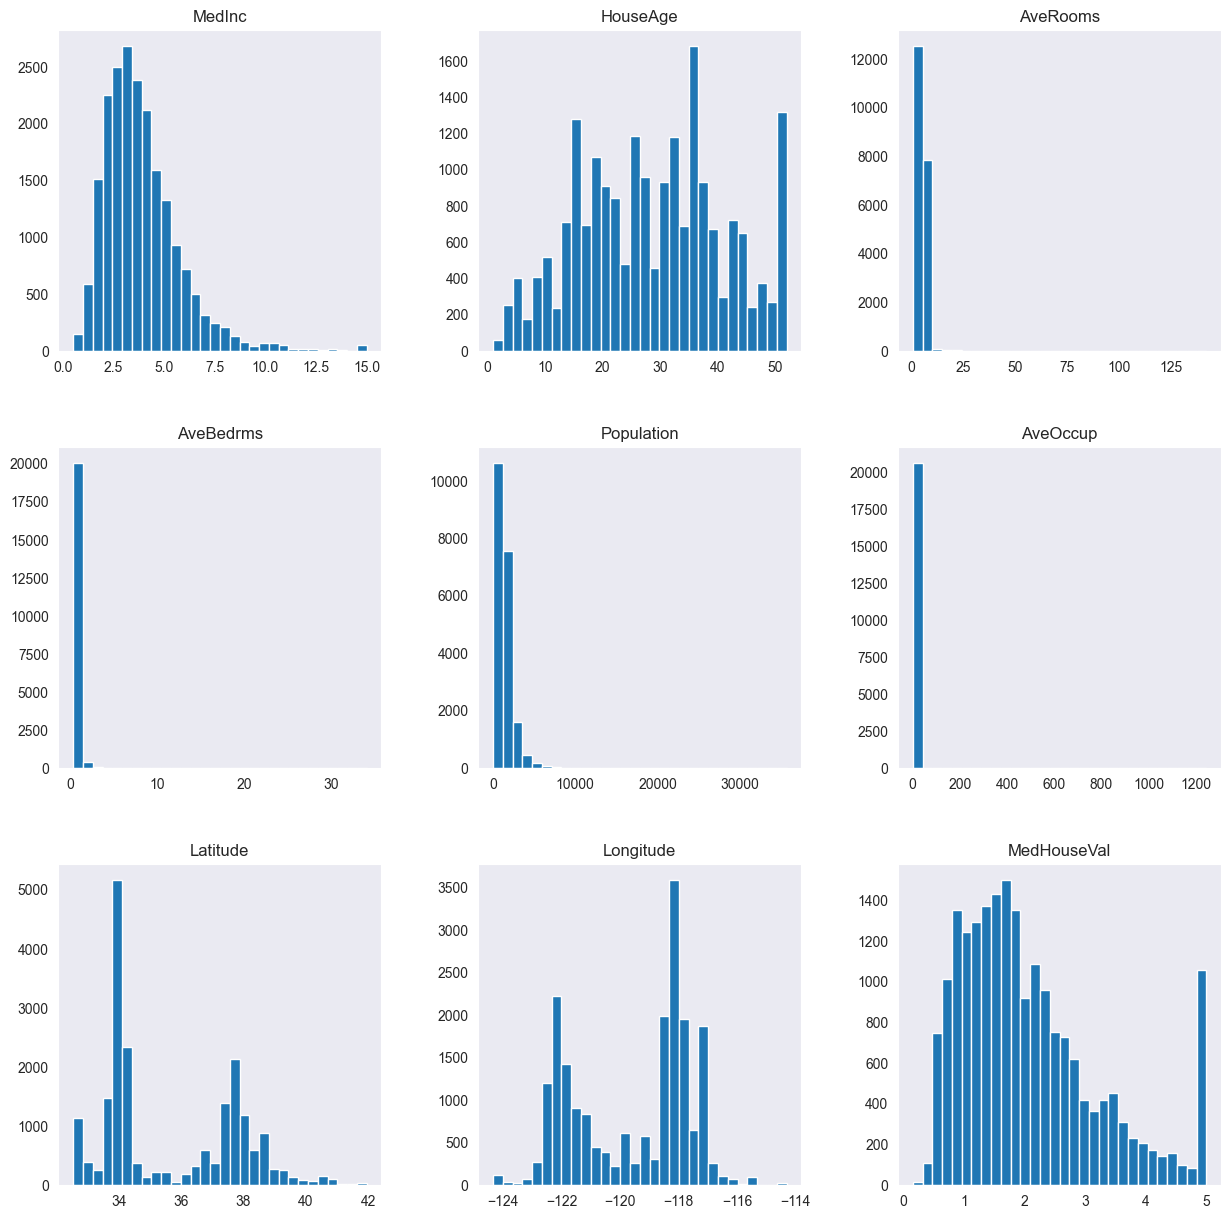

In [18]:
# plot histograms to see their distribution
df.hist(bins=30, figsize=[15,15], grid=False)
plt.show()

<Axes: >

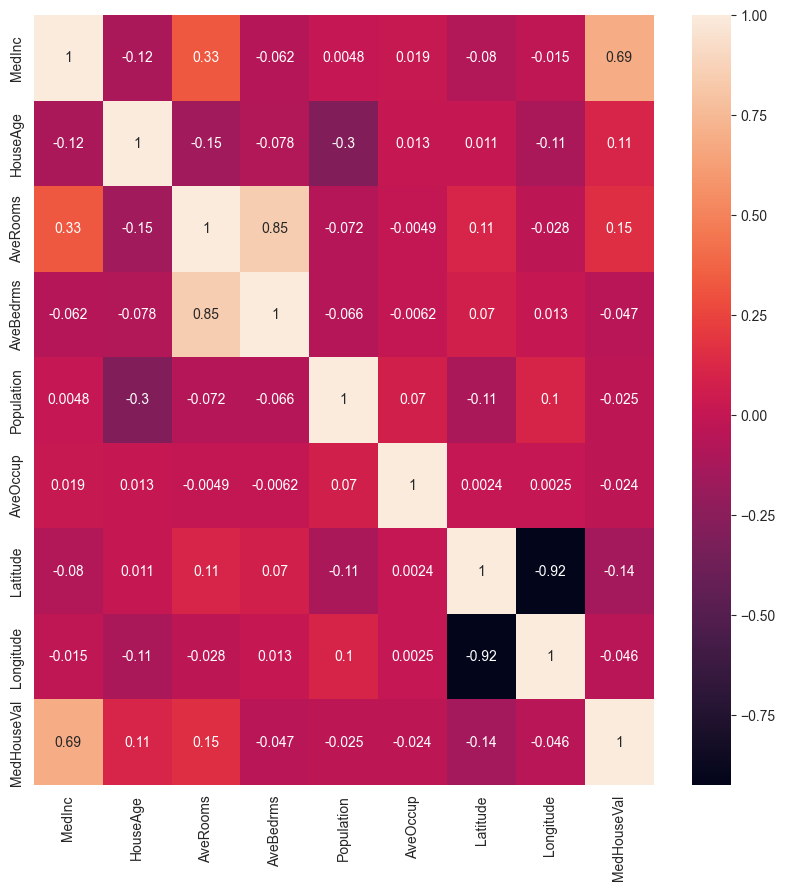

In [19]:
# see the relationship between features and target by using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

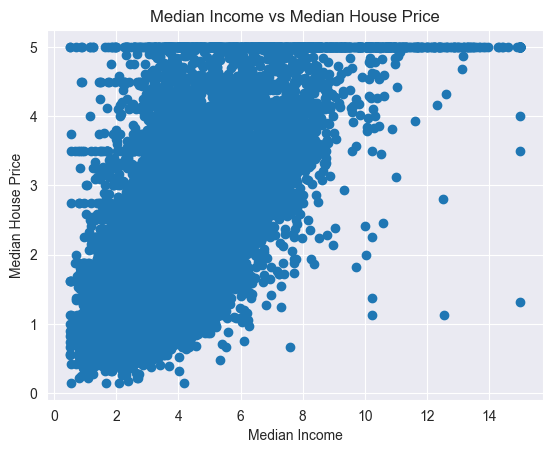

In [20]:
# scatter plot to see the relationship between MedHouseVal and MedInc
plt.scatter(df['MedInc'],df['MedHouseVal']) # .scatter(x-axis,y-axis)
plt.xlabel('Median Income')
plt.ylabel("Median House Price")
plt.title("Median Income vs Median House Price")
plt.show()

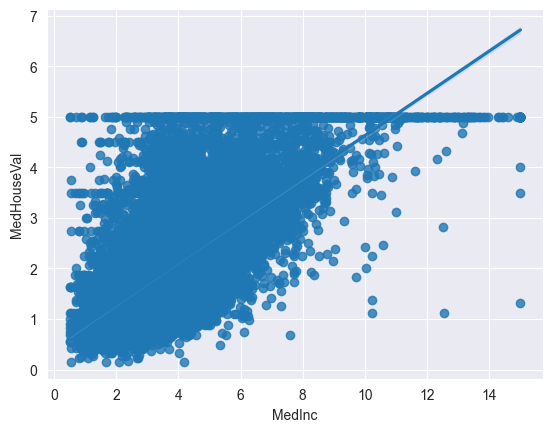

In [21]:
# more advanced scatter plot is the seaborn regplot
# regression plot (scatter plot + regression line)
sns.regplot(data=df, x='MedInc', y='MedHouseVal')
plt.show()
# when the line is above MedHouseVal = 5 > Extrapolating the dataset

In [22]:
# obtain a list of feature names
df.columns # all the feature names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [23]:
df.columns[0:8] # The second is the index of item you want + 1 (7+1 in this case)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [24]:
df.columns[:-1] # from beginning up to before the last one

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [25]:
features = df.columns[:-1].to_list() # convert the columns to a list
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

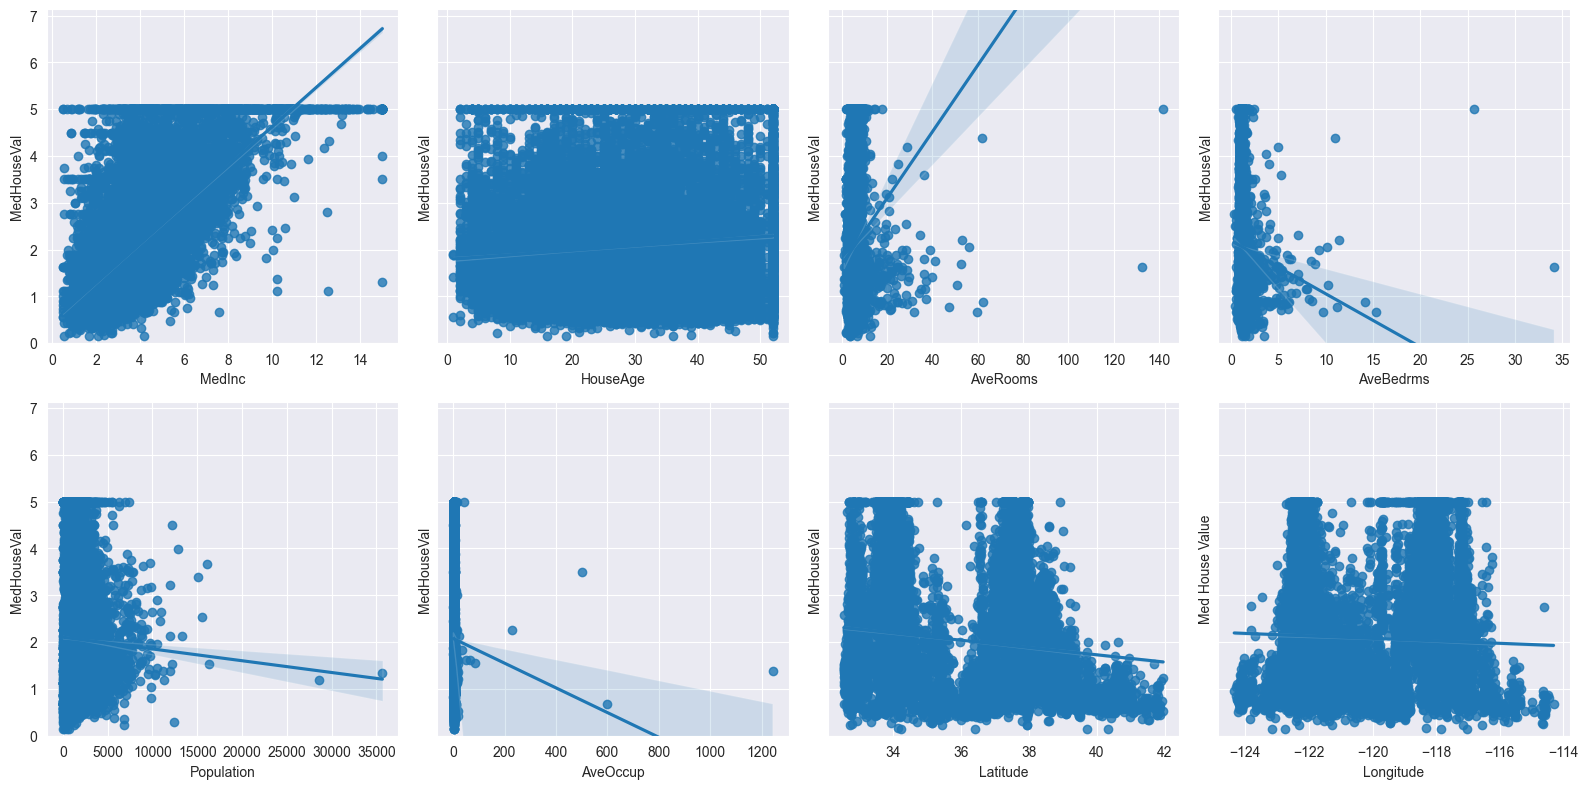

In [26]:
rows = 2
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(16,8), sharey=True) # sharey > every chart share the same y axis
# ax[0,0] first chart
# ax[0,1] second chart

feature_index = 0 # count the feature index that I want to plot

for i in range(rows): # range (2) > i will loop as 0,1
  for j in range(cols): # range(4) > j will loop as 0,1,2,3
    sns.regplot(data=df, x=features[feature_index], y='MedHouseVal', ax=ax[i,j])
    plt.ylabel("Med House Value")
    plt.xlabel(features[feature_index])
    plt.ylim(bottom=0) # set the yaxis limit
    feature_index += 1 # the same as feature_index = feature_index+1


plt.tight_layout() # this is to prevent the charts overlap, tune te spacing automatically
plt.show()


## Outliers
- Data points that deviate significantly from others
- Sometimes we will delete them, because they have significant impact on linear regression model performance
- But you need to test
- Only delete outliers appears in features not target variable

In [27]:
df['AveRooms']>120

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: AveRooms, Length: 20640, dtype: bool

In [28]:
df[df['AveRooms']>120]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [29]:
df[df['AveBedrms']>20]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [30]:
df[df['AveOccup']>200]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


In [31]:
df[df['Population']>25000]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344


# **3. Model Prediction**

In [32]:
# Univariate regression model (use MedInc only)
X = df[['MedInc']]
y = df['MedHouseVal']

In [33]:
# Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [34]:
X_train

,MedInc
1652,6.6134
14652,2.3578
3548,5.5111
6730,8.1124
18445,6.2957
...,...
3714,3.0395
7409,2.8000
19709,2.0978
5787,2.5924


In [35]:
y_train

1652     3.07000
14652    1.66700
3548     2.76600
6730     5.00001
18445    2.51800
          ...   
3714     1.91300
7409     1.61800
19709    1.34000
5787     1.92900
14155    1.84000
Name: MedHouseVal, Length: 16512, dtype: float64

In [36]:
# build the model
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
# training
model1.fit(X_train, y_train)
# prediction
y_pred = model1.predict(X_test)

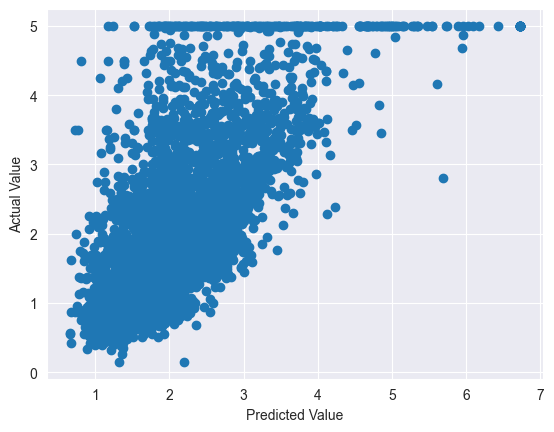

In [37]:
# visualise the prediction
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

# **4. Model Evaluation**
## **Regression Evaluation Metrics**

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

Here are three common evaluation metrics for regression problems:

1. **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors. It is calculated as: </br>
$$
MAE = \sum\limits _{i=1} ^ {n} \frac{|\hat{Y_{i}} - Y_{i} |}{n}
$$


2. **Mean Squared Error** (MSE) is the mean of the squared errors and is calculated as: </br>
$$
MSE = \frac{1}{n} \sum\limits _{i=1}^{n} (Y_{i} - \hat{Y_{i}})^2
$$


3. **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$
RMSE = \sqrt{\frac{1}{n} \sum\limits _{i=1}(Y_{i} - \hat{Y_{i}})^2}
$$

<font color=red>Notes: $Y_{i}$ is the actual value and $\hat{Y_{i}}$ is the predicted value</font>


Comparing these metrics:

*   **MAE** is the easiest to understand, because it's the average error.
*   **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
*   **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions** (to quantify the discripancy between actual values & predicted values), because we want to minimize them.

4. **R-Squared / Coefficient of Determination** measures how good your model can explain / predict your data. We will like to maximise this value when making predictions. (it's like measuring the degree of accuracy, 100% > predicted perfectly)

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

Let’s find the values for these metrics using our test data.

In [38]:
# Mean Absolute Error (MAE)

real = [2,3,6,8]
predict = [1,3,7,10]

# use predicted values - real values > and take the absolute value
after_minus = [1, 0, 1, 2]
MAE = (1+0+1+2)/4 

In [39]:
# Mean Squared Error (MSE)
after_minus_and_squared = [1,0,1,4] # squared > unit is USD^2
MSE = (1+1+4)/4 

In [40]:
# Root Mean Squared Error (RMSE)
after_minus_and_squared = [1,0,1,4] #
RMSE = sqrt[(1+1+4)] / 4 # 1.2 USD error

NameError: name 'sqrt' is not defined

if you import 1 function from a library</br>
`from .... import ....`



if you import 1 function from a library and rename it</br>
`from .... import .... as ____`


if you import 2 </br>
`from ... import .... , ....`

if you import 2 function from a library and rename it</br>
`from ... import .... as ____ , .... as _____`

In [42]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
# import 3 functions, mae, mse and r_square

In [43]:
print("Model 1 MAE: {}".format(mae(y_test, y_pred)))
print("Model 1 MSE: {}".format(mse(y_test, y_pred)))
print("Model 1 RMSE: {}".format(np.sqrt(mse(y_test, y_pred))))
print("Model 1 R-squared: {}".format(r2_score(y_test, y_pred)))

Model 1 MAE: 0.6252643746119817
Model 1 MSE: 0.7028749315031905
Model 1 RMSE: 0.8383763662599217
Model 1 R-squared: 0.4873925369905855


# 5. Improve your model
1. Linear regression with all features
2. Linear regression with all features without outliers

In [44]:
def make_prediction(dataframe, feature_names):
  df = dataframe.copy()
  X = df[feature_names] # feature_names is a list itself, so I don't need 2 []
  y = df['MedHouseVal']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  return model, y_test, y_pred

def evaluation(y_test, y_pred):
  print("Model MAE: {}".format(mae(y_test, y_pred)))
  print("Model MSE: {}".format(mse(y_test, y_pred)))
  print("Model RMSE: {}".format(np.sqrt(mse(y_test, y_pred))))
  print("Model R-squared: {}".format(r2_score(y_test, y_pred)))

In [45]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [46]:
# model with all features
model2, y_test2, y_pred2 = make_prediction(df, features)
evaluation(y_test2, y_pred2)

Model MAE: 0.5317682231427259
Model MSE: 0.526992795624804
Model RMSE: 0.7259426944496404
Model R-squared: 0.6156635727330055


In [47]:
# model without outliers
df2 = df.copy()
indice = [1914, 1979, 3364, 13034, 16669, 19006, 9880, 15360]

df2.drop(index=indice, inplace=True)
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [48]:
model3, y_test3, y_pred3 = make_prediction(df2, features)
evaluation(y_test3, y_pred3)

Model MAE: 0.5132944769173512
Model MSE: 0.5152522012623506
Model RMSE: 0.7178107001587192
Model R-squared: 0.6173305052380957


Text(0.5, 0, 'Predicted value')

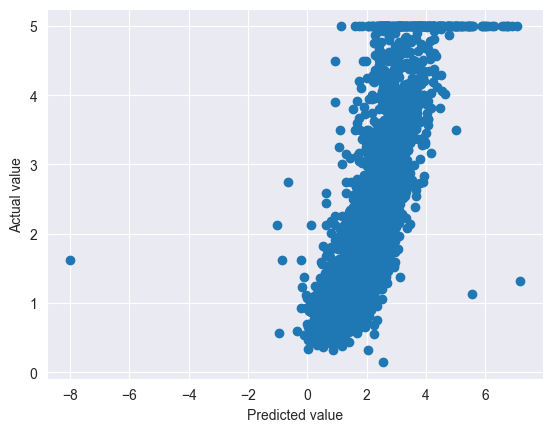

In [49]:
plt.scatter(y_pred3, y_test3)
plt.ylabel("Actual value")
plt.xlabel("Predicted value")

# the -8 prediction here will not appear, if you don't remove the outliers from "Population" column

# **6. Model Interpretation**

In [50]:
coefficients = pd.Series(data= model3.coef_, index=features)
coefficients

MedInc        0.433816
HouseAge      0.009994
AveRooms     -0.106143
AveBedrms     0.656801
Population    0.000017
AveOccup     -0.136815
Latitude     -0.421096
Longitude    -0.426161
dtype: float64

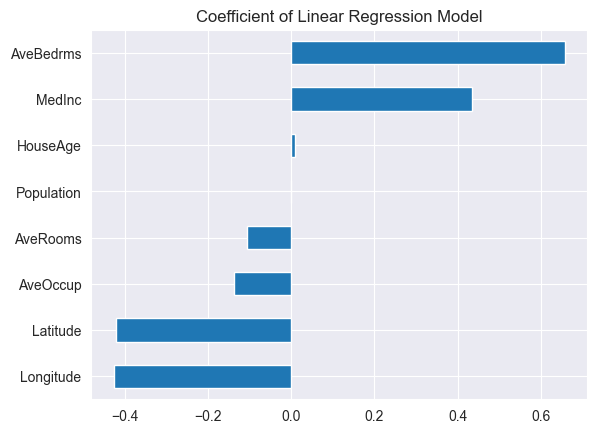

In [51]:
coefficients.sort_values().plot.barh() # horizontal bar chart
plt.title("Coefficient of Linear Regression Model")
plt.show()

# interpret the coefficients of AveBedrms:
# if all every other things are the same (keep constant), the median house price is expected to increase
# by 0.6568 if there is 1 AveBedrms increase

# In the Regplot, AveBedrms shows negative correlation with house values
# but in linear regression, it shows positive correlation
# This is because linear regression captures information from other variables as well,
# so when you consider other factors, more bedrooms will increase house price

# in contrast, the regplot only shows the relationship between average bedrooms and price
# it doesn't necessarily mean average bedroom causes price drop